In [ ]:
import numpy as np
import xml.etree.ElementTree as ET
import pylab as plt
from scipy.integrate import quad
%matplotlib inline

In [ ]:
file1 = 'catalog_gps_20180124.xml'

In [ ]:
tree = ET.parse(file1)
root = tree.getroot()

In [ ]:
Espace = np.logspace(2,5,101)
E = (Espace[1:]+Espace[0:-1])/2.
dE = Espace[1:]-Espace[0:-1]
Emask = (E>=300)&(E<=1000)
powerlaw = lambda E, pf,I,PE: pf*(E/PE)**I
logparabola = lambda E,pf,I,C,PE: pf*(E/PE)**(I+C*np.log(E/PE))

In [ ]:
specs = []
flux_300_1000 = []
for child in root.iter('spectrum'):
    if child.attrib['type']=='PowerLaw':
        Pf = float(child[0].attrib['value'])*float(child[0].attrib['scale'])*1000.
        In = float(child[1].attrib['value'])*float(child[1].attrib['scale'])
        PE = float(child[2].attrib['value'])*float(child[2].attrib['scale'])/1000.
        spec = powerlaw(E,Pf,In,PE)
        flux = (1./(In+1))*(Pf/PE**In)*(1000**(In+1)-300**(In+1))
    elif child.attrib['type']=='LogParabola':
        Pf = float(child[0].attrib['value'])*float(child[0].attrib['scale'])*1000.
        In = float(child[1].attrib['value'])*float(child[1].attrib['scale'])
        C = float(child[2].attrib['value'])*float(child[2].attrib['scale'])
        PE = float(child[3].attrib['value'])*float(child[3].attrib['scale'])/1000.
        spec = logparabola(E,Pf,In,C,PE)
        flux = quad(logparabola,300,1000,args=(Pf,In,C,PE))[0]
        
    flux_300_1000.append(flux)    
    specs.append(spec)
specs = np.array(specs)


In [ ]:
hist,bins = np.histogram(flux_300_1000,bins= np.logspace(-14,-10,15))
bins = (bins[1:]+bins[0:-1])/2.
plt.loglog(bins,hist,marker='s')

In [6]:
import readXML
import numpy as np
import pylab as plt
%matplotlib inline
file1 =  'catalog_gps_20180124.xml'
file2 = 'catalog_gps_20180124_lowTS.xml'

In [10]:
f,s = readXML.flux_spec(file1)
f1,s2 = readXML.flux_spec(file2)


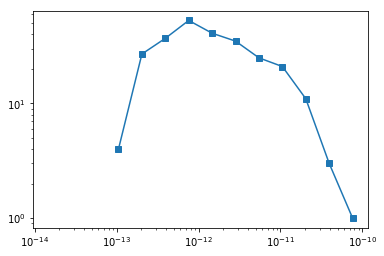

In [13]:
hist,bins = np.histogram(f,bins= np.logspace(-14,-10,15))
bins = (bins[1:]+bins[0:-1])/2.
plt.loglog(bins,hist,marker='s')


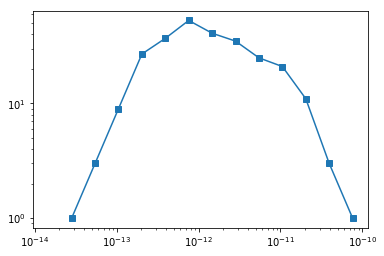

In [14]:
f = np.concatenate((f,f1))
hist,bins = np.histogram(f,bins= np.logspace(-14,-10,15))
bins = (bins[1:]+bins[0:-1])/2.
plt.loglog(bins,hist,marker='s')